In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import graphviz
import pyarrow

from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

sns.set_style("white")
plt.rcParams['figure.dpi'] = 300

In [2]:
Awards_Batting_HoF_df = pd.read_feather("Awards_Batting_HoF.feather")

In [3]:
Awards_Batting_HoF_df[['Batting_df_G', 'Batting_df_AB', 'Batting_df_R', 'Batting_df_H', 'Batting_df_2B', 'Batting_df_3B', 'Batting_df_HR', 'Batting_df_RBI', 'Batting_df_SB', 'Batting_df_CS', 'Batting_df_BB', 'Batting_df_SO', 'Batting_df_IBB', 'Batting_df_HBP', 'Batting_df_SH', 'Batting_df_SF', 'Batting_df_GIDP', 'BattingPost_df_G', 'BattingPost_df_AB', 'BattingPost_df_R', 'BattingPost_df_H', 'BattingPost_df_2B', 'BattingPost_df_3B', 'BattingPost_df_HR', 'BattingPost_df_RBI', 'BattingPost_df_SB', 'BattingPost_df_CS', 'BattingPost_df_BB', 'BattingPost_df_SO', 'BattingPost_df_IBB', 'BattingPost_df_HBP', 'BattingPost_df_SH', 'BattingPost_df_SF', 'BattingPost_df_GIDP']] = Awards_Batting_HoF_df[['Batting_df_G', 'Batting_df_AB', 'Batting_df_R', 'Batting_df_H', 'Batting_df_2B', 'Batting_df_3B', 'Batting_df_HR', 'Batting_df_RBI', 'Batting_df_SB', 'Batting_df_CS', 'Batting_df_BB', 'Batting_df_SO', 'Batting_df_IBB', 'Batting_df_HBP', 'Batting_df_SH', 'Batting_df_SF', 'Batting_df_GIDP', 'BattingPost_df_G', 'BattingPost_df_AB', 'BattingPost_df_R', 'BattingPost_df_H', 'BattingPost_df_2B', 'BattingPost_df_3B', 'BattingPost_df_HR', 'BattingPost_df_RBI', 'BattingPost_df_SB', 'BattingPost_df_CS', 'BattingPost_df_BB', 'BattingPost_df_SO', 'BattingPost_df_IBB', 'BattingPost_df_HBP', 'BattingPost_df_SH', 'BattingPost_df_SF', 'BattingPost_df_GIDP']].abs()

In [4]:
print(Awards_Batting_HoF_df.columns.tolist())
Awards_Batting_HoF_df.info()

['playerID', 'AllstarFull_df_yearID', 'AwardsPlayers_df_yearID', 'Batting_df_yearID', 'Batting_df_stint', 'Batting_df_teamID', 'Batting_df_lgID', 'Batting_df_G', 'Batting_df_AB', 'Batting_df_R', 'Batting_df_H', 'Batting_df_2B', 'Batting_df_3B', 'Batting_df_HR', 'Batting_df_RBI', 'Batting_df_SB', 'Batting_df_CS', 'Batting_df_BB', 'Batting_df_SO', 'Batting_df_IBB', 'Batting_df_HBP', 'Batting_df_SH', 'Batting_df_SF', 'Batting_df_GIDP', 'BattingPost_df_yearID', 'BattingPost_df_round', 'BattingPost_df_teamID', 'BattingPost_df_lgID', 'BattingPost_df_G', 'BattingPost_df_AB', 'BattingPost_df_R', 'BattingPost_df_H', 'BattingPost_df_2B', 'BattingPost_df_3B', 'BattingPost_df_HR', 'BattingPost_df_RBI', 'BattingPost_df_SB', 'BattingPost_df_CS', 'BattingPost_df_BB', 'BattingPost_df_SO', 'BattingPost_df_IBB', 'BattingPost_df_HBP', 'BattingPost_df_SH', 'BattingPost_df_SF', 'BattingPost_df_GIDP', 'HallOfFame_df_yearid', 'HallOfFame_df_inducted']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013963

In [5]:
Awards_Batting_HoF_df.head()

playerID AllstarFull_df_yearID AwardsPlayers_df_yearID Batting_df_yearID  \
0  gomezle01                  1933                    1932              1930   
1  gomezle01                  1933                    1932              1930   
2  gomezle01                  1933                    1932              1930   
3  gomezle01                  1933                    1932              1930   
4  gomezle01                  1933                    1932              1930   

   Batting_df_stint Batting_df_teamID Batting_df_lgID  Batting_df_G  \
0                 1               NYA              AL            15   
1                 1               NYA              AL            15   
2                 1               NYA              AL            15   
3                 1               NYA              AL            15   
4                 1               NYA              AL            15   

   Batting_df_AB  Batting_df_R  ...  BattingPost_df_CS  BattingPost_df_BB  \
0             20             1  ...                  0                  0   
1             20             1  ...                  0                  0   
2             20             1  ...                  0                  0   
3             20             1  ...                  0                  0   
4             20             1  ...                  0                  0   

   BattingPost_df_SO  BattingPost_df_IBB  BattingPost_df_HBP  \
0                  2                   0                   0   
1                  2                   0                   0   
2                  2                   0                   0   
3                  2                   0                   0   
4                  2                   0                   0   

   BattingPost_df_SH  BattingPost_df_SF  BattingPost_df_GIDP  \
0                  0                  0                    0   
1                  0                  0                    0   
2                  0                  0                    0   
3                  0                  0                    0   
4                  0                  0                    0   

   HallOfFame_df_yearid  HallOfFame_df_inducted  
0                  1945                   False  
1                  1946                   False  
2                  1947                   False  
3                  1948                   False  
4                  1949                   False  

[5 rows x 47 columns]

In [6]:
Awards_Batting_HoF_df = Awards_Batting_HoF_df.drop_duplicates(subset=['playerID', 'Batting_df_yearID'])

In [7]:
X = Awards_Batting_HoF_df[['Batting_df_G', 'Batting_df_AB', 'Batting_df_R', 'Batting_df_H', 'Batting_df_2B', 'Batting_df_3B', 'Batting_df_HR', 'Batting_df_RBI', 'Batting_df_SB', 'Batting_df_CS', 'Batting_df_BB', 'Batting_df_SO', 'Batting_df_IBB', 'Batting_df_HBP', 'Batting_df_SH', 'Batting_df_SF', 'Batting_df_GIDP']]
y = Awards_Batting_HoF_df['HallOfFame_df_inducted']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model_1 = LogisticRegression()
log_model_1.fit(X_train_scaled, y_train)

y_pred = log_model_1.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1422    7]
 [ 183    6]]

Classification Report:
              precision    recall  f1-score   support

       False       0.89      1.00      0.94      1429
        True       0.46      0.03      0.06       189

    accuracy                           0.88      1618
   macro avg       0.67      0.51      0.50      1618
weighted avg       0.84      0.88      0.83      1618



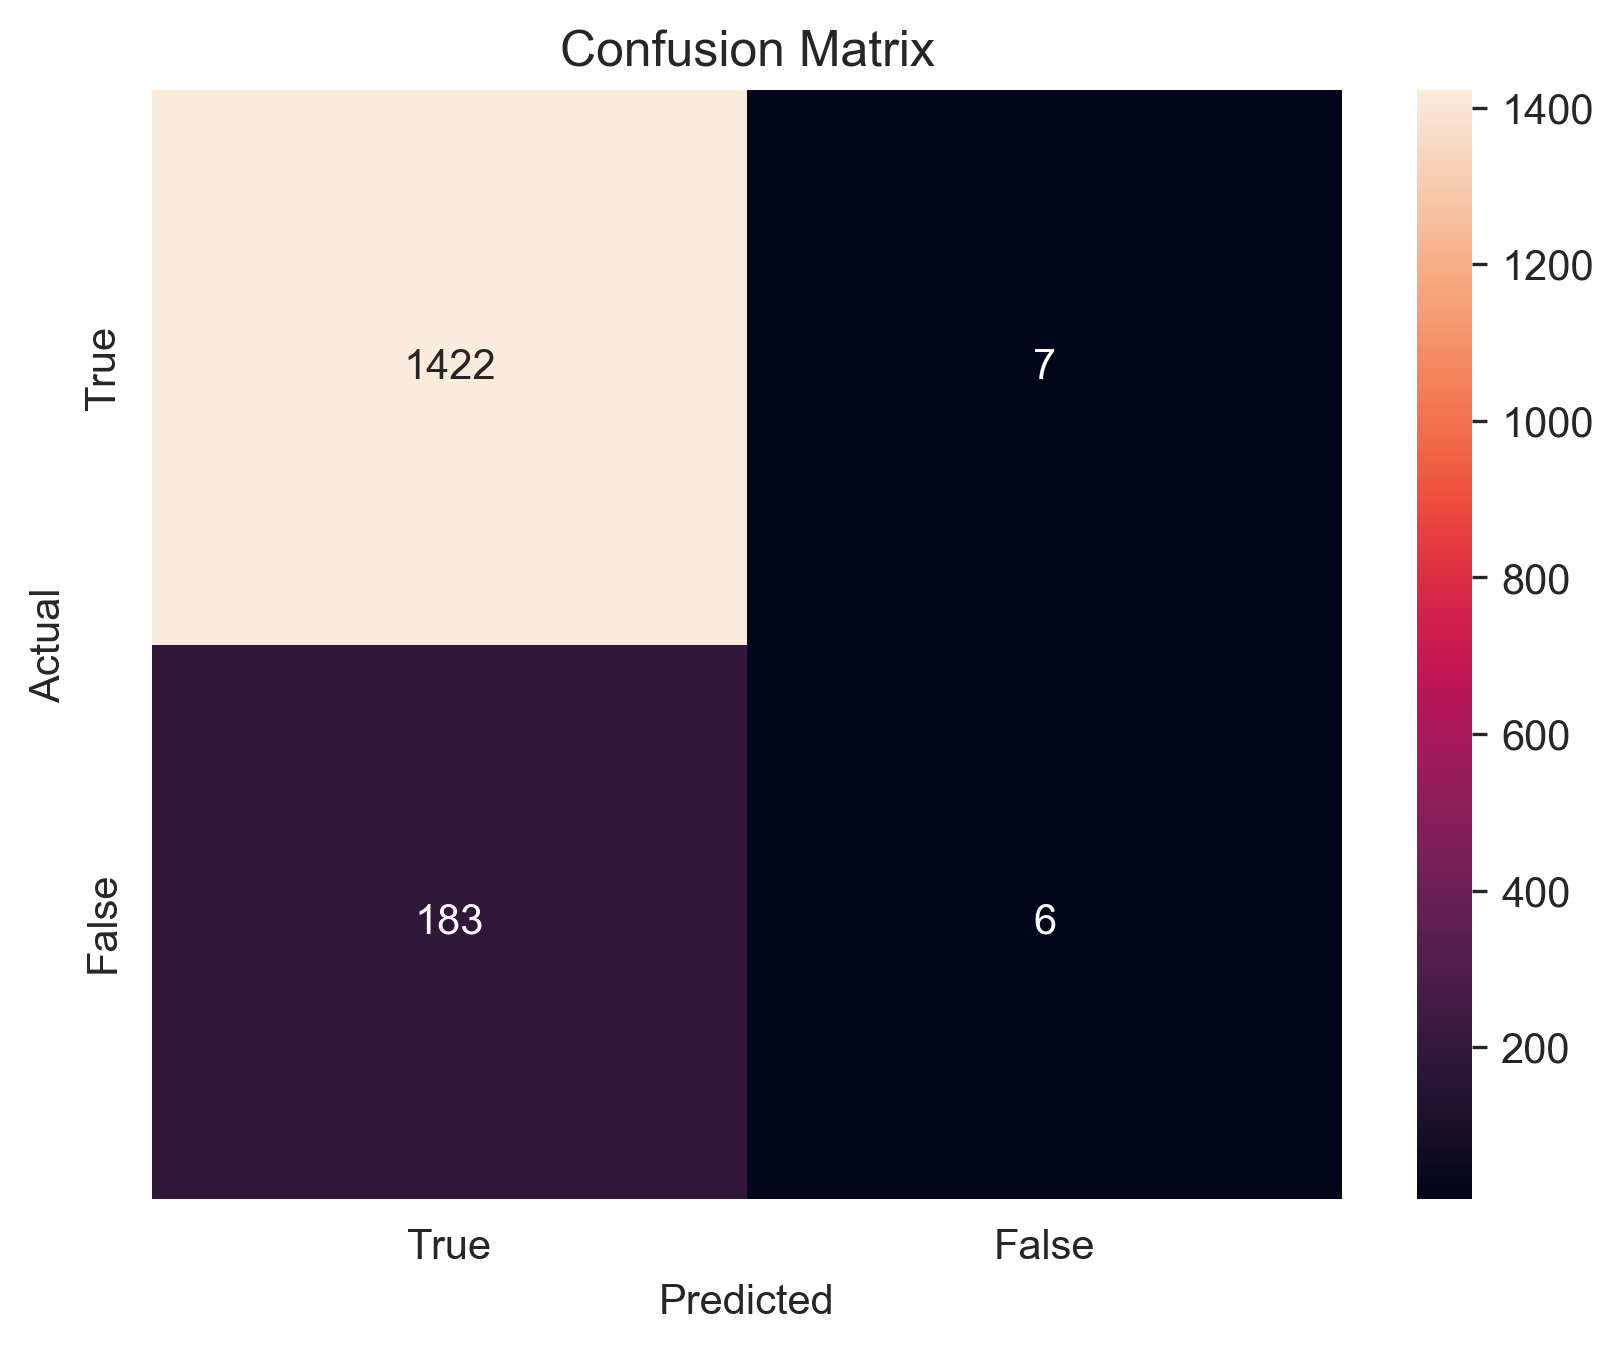

<Figure size 1920x1440 with 0 Axes>

In [8]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', 
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

plt.savefig('log_model_1.png')

In [9]:
importance = log_model_1.coef_[0]  
feature_names = X.columns  

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df['Absolute Importance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)
print(importance_df)

            Feature  Importance  Absolute Importance
10    Batting_df_BB    0.458692             0.458692
6     Batting_df_HR    0.328330             0.328330
7    Batting_df_RBI   -0.311806             0.311806
13   Batting_df_HBP   -0.307930             0.307930
3      Batting_df_H   -0.306063             0.306063
12   Batting_df_IBB    0.262436             0.262436
8     Batting_df_SB    0.229249             0.229249
16  Batting_df_GIDP    0.177134             0.177134
0      Batting_df_G   -0.145659             0.145659
1     Batting_df_AB    0.124667             0.124667
15    Batting_df_SF    0.122374             0.122374
9     Batting_df_CS   -0.108302             0.108302
11    Batting_df_SO   -0.104032             0.104032
5     Batting_df_3B    0.081975             0.081975
4     Batting_df_2B   -0.059698             0.059698
2      Batting_df_R    0.040839             0.040839
14    Batting_df_SH    0.017346             0.017346


Feature Engineering career stats rather than season stats.

In [10]:
Awards_Batting_HoF_df['Batting_df_G_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_G'].transform('mean')
Awards_Batting_HoF_df['Batting_df_G_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_G'].transform('sum')

Awards_Batting_HoF_df['Batting_df_AB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_AB'].transform('mean')
Awards_Batting_HoF_df['Batting_df_AB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_AB'].transform('sum')

Awards_Batting_HoF_df['Batting_df_R_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_R'].transform('mean')
Awards_Batting_HoF_df['Batting_df_R_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_R'].transform('sum')

Awards_Batting_HoF_df['Batting_df_H_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_H'].transform('mean')
Awards_Batting_HoF_df['Batting_df_H_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_H'].transform('sum')

Awards_Batting_HoF_df['Batting_df_2B_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_2B'].transform('mean')
Awards_Batting_HoF_df['Batting_df_2B_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_2B'].transform('sum')

Awards_Batting_HoF_df['Batting_df_3B_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_3B'].transform('mean')
Awards_Batting_HoF_df['Batting_df_3B_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_3B'].transform('sum')

Awards_Batting_HoF_df['Batting_df_HR_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_HR'].transform('mean')
Awards_Batting_HoF_df['Batting_df_HR_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_HR'].transform('sum')

Awards_Batting_HoF_df['Batting_df_RBI_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_RBI'].transform('mean')
Awards_Batting_HoF_df['Batting_df_RBI_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_RBI'].transform('sum')

Awards_Batting_HoF_df['Batting_df_SB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SB'].transform('mean')
Awards_Batting_HoF_df['Batting_df_SB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SB'].transform('sum')

Awards_Batting_HoF_df['Batting_df_CS_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_CS'].transform('mean')
Awards_Batting_HoF_df['Batting_df_CS_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_CS'].transform('sum')

Awards_Batting_HoF_df['Batting_df_BB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_BB'].transform('mean')
Awards_Batting_HoF_df['Batting_df_BB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_BB'].transform('sum')

Awards_Batting_HoF_df['Batting_df_SO_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SO'].transform('mean')
Awards_Batting_HoF_df['Batting_df_SO_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SO'].transform('sum')

Awards_Batting_HoF_df['Batting_df_IBB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_IBB'].transform('mean')
Awards_Batting_HoF_df['Batting_df_IBB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_IBB'].transform('sum')

Awards_Batting_HoF_df['Batting_df_HBP_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_HBP'].transform('mean')
Awards_Batting_HoF_df['Batting_df_HBP_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_HBP'].transform('sum')

Awards_Batting_HoF_df['Batting_df_SH_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SH'].transform('mean')
Awards_Batting_HoF_df['Batting_df_SH_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SH'].transform('sum')

Awards_Batting_HoF_df['Batting_df_SF_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SF'].transform('mean')
Awards_Batting_HoF_df['Batting_df_SF_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SF'].transform('sum')

Awards_Batting_HoF_df['Batting_df_GIDP_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_GIDP'].transform('mean')
Awards_Batting_HoF_df['Batting_df_GIDP_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_GIDP'].transform('sum')

In [11]:
print(Awards_Batting_HoF_df.columns.tolist())

['playerID', 'AllstarFull_df_yearID', 'AwardsPlayers_df_yearID', 'Batting_df_yearID', 'Batting_df_stint', 'Batting_df_teamID', 'Batting_df_lgID', 'Batting_df_G', 'Batting_df_AB', 'Batting_df_R', 'Batting_df_H', 'Batting_df_2B', 'Batting_df_3B', 'Batting_df_HR', 'Batting_df_RBI', 'Batting_df_SB', 'Batting_df_CS', 'Batting_df_BB', 'Batting_df_SO', 'Batting_df_IBB', 'Batting_df_HBP', 'Batting_df_SH', 'Batting_df_SF', 'Batting_df_GIDP', 'BattingPost_df_yearID', 'BattingPost_df_round', 'BattingPost_df_teamID', 'BattingPost_df_lgID', 'BattingPost_df_G', 'BattingPost_df_AB', 'BattingPost_df_R', 'BattingPost_df_H', 'BattingPost_df_2B', 'BattingPost_df_3B', 'BattingPost_df_HR', 'BattingPost_df_RBI', 'BattingPost_df_SB', 'BattingPost_df_CS', 'BattingPost_df_BB', 'BattingPost_df_SO', 'BattingPost_df_IBB', 'BattingPost_df_HBP', 'BattingPost_df_SH', 'BattingPost_df_SF', 'BattingPost_df_GIDP', 'HallOfFame_df_yearid', 'HallOfFame_df_inducted', 'Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_

In [12]:
reg_seas_df = Awards_Batting_HoF_df[['playerID' ,'HallOfFame_df_inducted', 'Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_avg', 'Batting_df_AB_total', 'Batting_df_R_avg', 'Batting_df_R_total', 'Batting_df_H_avg', 'Batting_df_H_total', 'Batting_df_2B_avg', 'Batting_df_2B_total', 'Batting_df_3B_avg', 'Batting_df_3B_total', 'Batting_df_HR_avg', 'Batting_df_HR_total', 'Batting_df_RBI_avg', 'Batting_df_RBI_total', 'Batting_df_SB_avg', 'Batting_df_SB_total', 'Batting_df_CS_avg', 'Batting_df_CS_total', 'Batting_df_BB_avg', 'Batting_df_BB_total', 'Batting_df_SO_avg', 'Batting_df_SO_total', 'Batting_df_IBB_avg', 'Batting_df_IBB_total', 'Batting_df_HBP_avg', 'Batting_df_HBP_total', 'Batting_df_SH_avg', 'Batting_df_SH_total', 'Batting_df_SF_avg', 'Batting_df_SF_total', 'Batting_df_GIDP_avg', 'Batting_df_GIDP_total']]

In [13]:
reg_seas_df = reg_seas_df.drop_duplicates(subset='playerID')
reg_seas_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 10056146
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   playerID                499 non-null    category
 1   HallOfFame_df_inducted  499 non-null    bool    
 2   Batting_df_G_avg        499 non-null    float64 
 3   Batting_df_G_total      499 non-null    int64   
 4   Batting_df_AB_avg       499 non-null    float64 
 5   Batting_df_AB_total     499 non-null    int64   
 6   Batting_df_R_avg        499 non-null    float64 
 7   Batting_df_R_total      499 non-null    int64   
 8   Batting_df_H_avg        499 non-null    float64 
 9   Batting_df_H_total      499 non-null    int64   
 10  Batting_df_2B_avg       499 non-null    float64 
 11  Batting_df_2B_total     499 non-null    int64   
 12  Batting_df_3B_avg       499 non-null    float64 
 13  Batting_df_3B_total     499 non-null    int64   
 14  Batting_df_HR_avg       49

In [14]:
print(reg_seas_df.columns.tolist())

['playerID', 'HallOfFame_df_inducted', 'Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_avg', 'Batting_df_AB_total', 'Batting_df_R_avg', 'Batting_df_R_total', 'Batting_df_H_avg', 'Batting_df_H_total', 'Batting_df_2B_avg', 'Batting_df_2B_total', 'Batting_df_3B_avg', 'Batting_df_3B_total', 'Batting_df_HR_avg', 'Batting_df_HR_total', 'Batting_df_RBI_avg', 'Batting_df_RBI_total', 'Batting_df_SB_avg', 'Batting_df_SB_total', 'Batting_df_CS_avg', 'Batting_df_CS_total', 'Batting_df_BB_avg', 'Batting_df_BB_total', 'Batting_df_SO_avg', 'Batting_df_SO_total', 'Batting_df_IBB_avg', 'Batting_df_IBB_total', 'Batting_df_HBP_avg', 'Batting_df_HBP_total', 'Batting_df_SH_avg', 'Batting_df_SH_total', 'Batting_df_SF_avg', 'Batting_df_SF_total', 'Batting_df_GIDP_avg', 'Batting_df_GIDP_total']


In [15]:
X = reg_seas_df[['Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_avg', 'Batting_df_AB_total', 'Batting_df_R_avg', 'Batting_df_R_total', 'Batting_df_H_avg', 'Batting_df_H_total', 'Batting_df_2B_avg', 'Batting_df_2B_total', 'Batting_df_3B_avg', 'Batting_df_3B_total', 'Batting_df_HR_avg', 'Batting_df_HR_total', 'Batting_df_RBI_avg', 'Batting_df_RBI_total', 'Batting_df_SB_avg', 'Batting_df_SB_total', 'Batting_df_CS_avg', 'Batting_df_CS_total', 'Batting_df_BB_avg', 'Batting_df_BB_total', 'Batting_df_SO_avg', 'Batting_df_SO_total', 'Batting_df_IBB_avg', 'Batting_df_IBB_total', 'Batting_df_HBP_avg', 'Batting_df_HBP_total', 'Batting_df_SH_avg', 'Batting_df_SH_total', 'Batting_df_SF_avg', 'Batting_df_SF_total', 'Batting_df_GIDP_avg', 'Batting_df_GIDP_total']]
y = reg_seas_df['HallOfFame_df_inducted']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model_2 = LogisticRegression()
log_model_2.fit(X_train_scaled, y_train)

y_pred = log_model_2.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[89  0]
 [ 9  2]]

Classification Report:
              precision    recall  f1-score   support

       False       0.91      1.00      0.95        89
        True       1.00      0.18      0.31        11

    accuracy                           0.91       100
   macro avg       0.95      0.59      0.63       100
weighted avg       0.92      0.91      0.88       100



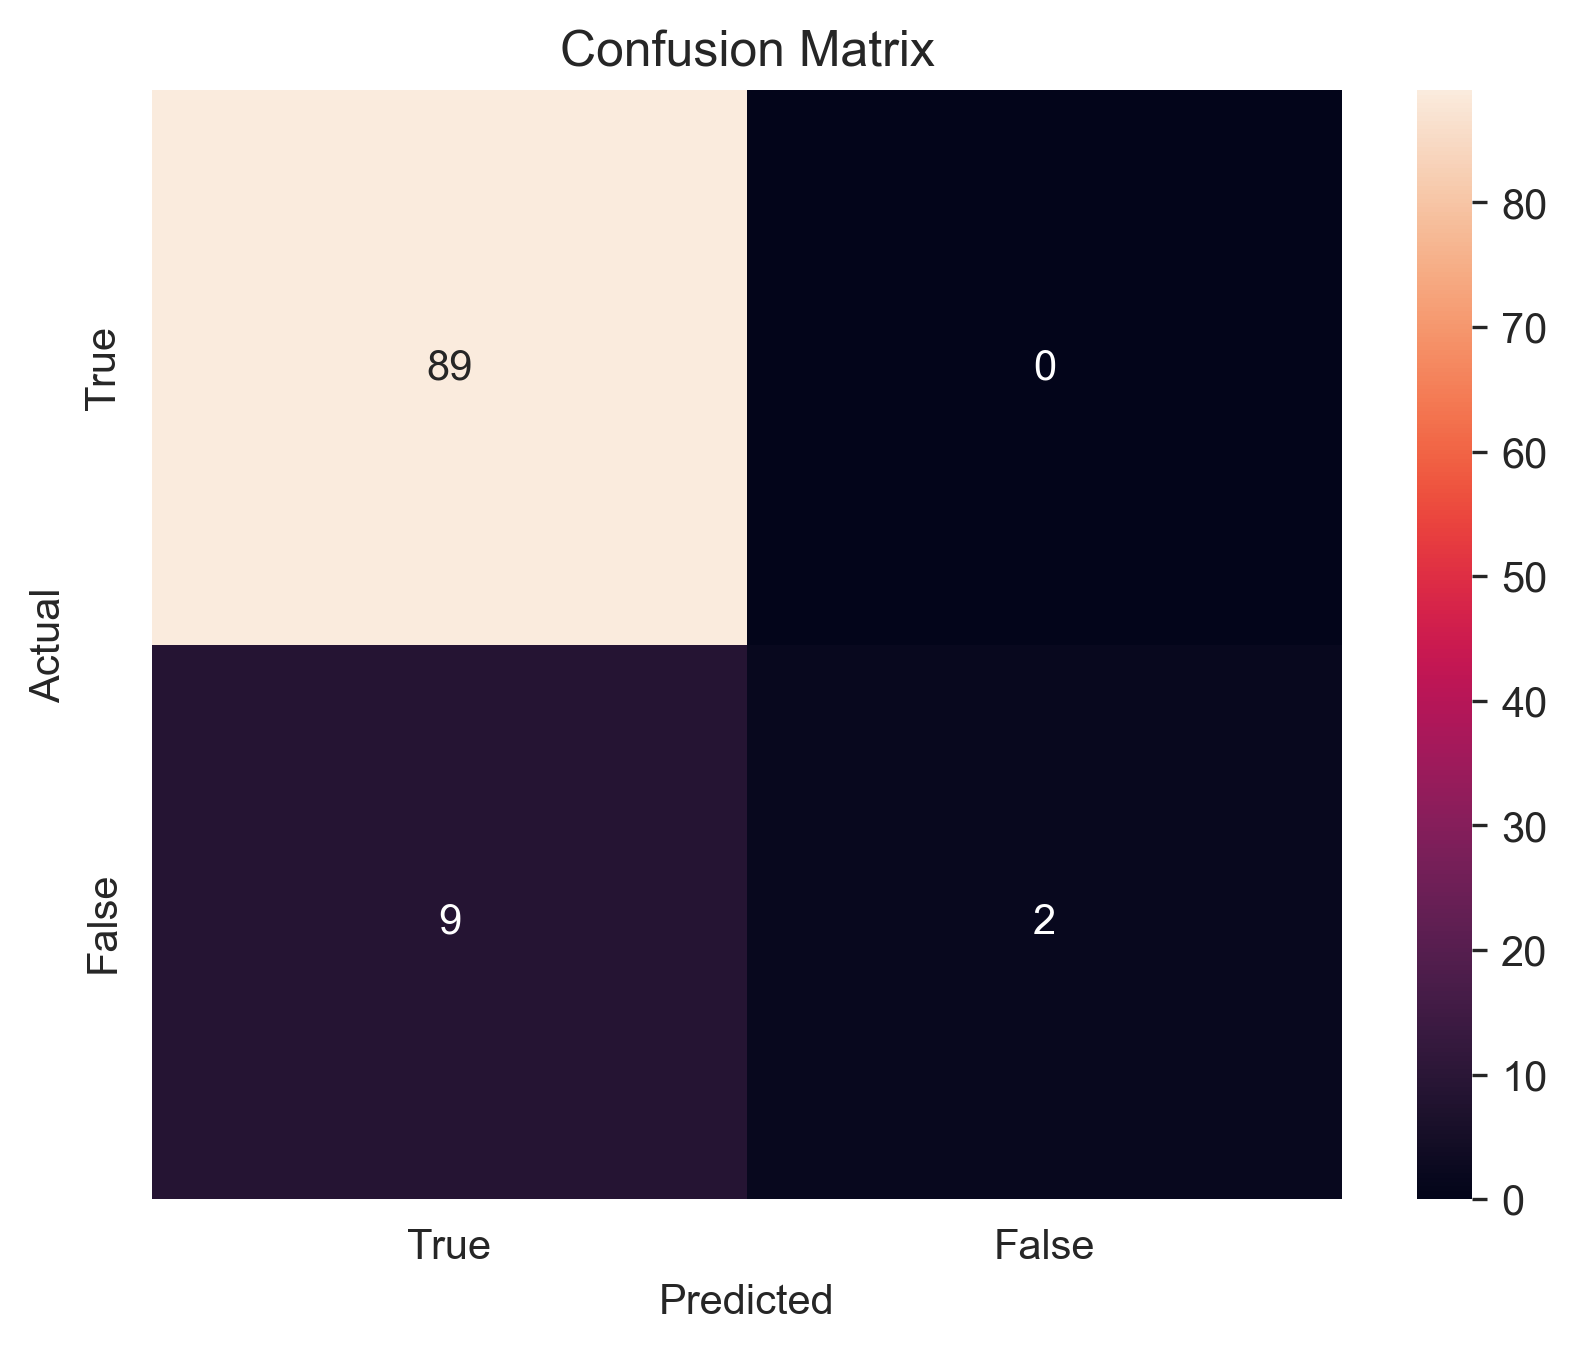

<Figure size 1920x1440 with 0 Axes>

In [16]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', 
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

plt.savefig('log_model_2.png')

In [17]:
importance = log_model_2.coef_[0]  
feature_names = X.columns  

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df['Absolute Importance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)
print(importance_df)

                  Feature  Importance  Absolute Importance
0        Batting_df_G_avg   -1.103126             1.103126
6        Batting_df_H_avg   -1.092026             1.092026
23    Batting_df_SO_total    0.952608             0.952608
27   Batting_df_HBP_total   -0.910172             0.910172
3     Batting_df_AB_total    0.873737             0.873737
13    Batting_df_HR_total    0.715998             0.715998
21    Batting_df_BB_total    0.610891             0.610891
2       Batting_df_AB_avg   -0.610742             0.610742
31    Batting_df_SF_total    0.574363             0.574363
29    Batting_df_SH_total    0.463377             0.463377
7      Batting_df_H_total   -0.416339             0.416339
32    Batting_df_GIDP_avg    0.394235             0.394235
26     Batting_df_HBP_avg    0.388605             0.388605
14     Batting_df_RBI_avg   -0.382161             0.382161
33  Batting_df_GIDP_total    0.354511             0.354511
24     Batting_df_IBB_avg    0.324229             0.3242

Feature engineering in post season stats

In [18]:
Awards_Batting_HoF_df['BattingPost_df_G_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_G'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_G_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_G'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_AB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_AB'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_AB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_AB'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_R_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_R'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_R_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_R'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_H_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_H'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_H_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_H'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_2B_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_2B'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_2B_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_2B'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_3B_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_3B'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_3B_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_3B'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_HR_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_HR'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_HR_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_HR'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_RBI_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_RBI'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_RBI_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_RBI'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_SB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SB'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_SB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SB'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_CS_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_CS'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_CS_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_CS'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_BB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_BB'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_BB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_BB'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_SO_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SO'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_SO_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SO'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_IBB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_IBB'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_IBB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_IBB'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_HBP_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_HBP'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_HBP_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_HBP'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_SH_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SH'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_SH_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SH'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_SF_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SF'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_SF_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SF'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_GIDP_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_GIDP'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_GIDP_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_GIDP'].transform('sum')

C:\Users\cltro\AppData\Local\Temp\ipykernel_20736\2908066783.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Awards_Batting_HoF_df['BattingPost_df_SF_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SF'].transform('mean')
C:\Users\cltro\AppData\Local\Temp\ipykernel_20736\2908066783.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Awards_Batting_HoF_df['BattingPost_df_SF_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SF'].transform('sum')
C:\Users\cltr

In [19]:
print(Awards_Batting_HoF_df.columns.tolist())

['playerID', 'AllstarFull_df_yearID', 'AwardsPlayers_df_yearID', 'Batting_df_yearID', 'Batting_df_stint', 'Batting_df_teamID', 'Batting_df_lgID', 'Batting_df_G', 'Batting_df_AB', 'Batting_df_R', 'Batting_df_H', 'Batting_df_2B', 'Batting_df_3B', 'Batting_df_HR', 'Batting_df_RBI', 'Batting_df_SB', 'Batting_df_CS', 'Batting_df_BB', 'Batting_df_SO', 'Batting_df_IBB', 'Batting_df_HBP', 'Batting_df_SH', 'Batting_df_SF', 'Batting_df_GIDP', 'BattingPost_df_yearID', 'BattingPost_df_round', 'BattingPost_df_teamID', 'BattingPost_df_lgID', 'BattingPost_df_G', 'BattingPost_df_AB', 'BattingPost_df_R', 'BattingPost_df_H', 'BattingPost_df_2B', 'BattingPost_df_3B', 'BattingPost_df_HR', 'BattingPost_df_RBI', 'BattingPost_df_SB', 'BattingPost_df_CS', 'BattingPost_df_BB', 'BattingPost_df_SO', 'BattingPost_df_IBB', 'BattingPost_df_HBP', 'BattingPost_df_SH', 'BattingPost_df_SF', 'BattingPost_df_GIDP', 'HallOfFame_df_yearid', 'HallOfFame_df_inducted', 'Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_

In [20]:
eng_stats_df = Awards_Batting_HoF_df[['playerID','HallOfFame_df_inducted', 'Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_avg', 'Batting_df_AB_total', 'Batting_df_R_avg', 'Batting_df_R_total', 'Batting_df_H_avg', 'Batting_df_H_total', 'Batting_df_2B_avg', 'Batting_df_2B_total', 'Batting_df_3B_avg', 'Batting_df_3B_total', 'Batting_df_HR_avg', 'Batting_df_HR_total', 'Batting_df_RBI_avg', 'Batting_df_RBI_total', 'Batting_df_SB_avg', 'Batting_df_SB_total', 'Batting_df_CS_avg', 'Batting_df_CS_total', 'Batting_df_BB_avg', 'Batting_df_BB_total', 'Batting_df_SO_avg', 'Batting_df_SO_total', 'Batting_df_IBB_avg', 'Batting_df_IBB_total', 'Batting_df_HBP_avg', 'Batting_df_HBP_total', 'Batting_df_SH_avg', 'Batting_df_SH_total', 'Batting_df_SF_avg', 'Batting_df_SF_total', 'Batting_df_GIDP_avg', 'Batting_df_GIDP_total', 'BattingPost_df_G_avg', 'BattingPost_df_G_total', 'BattingPost_df_AB_avg', 'BattingPost_df_AB_total', 'BattingPost_df_R_avg', 'BattingPost_df_R_total', 'BattingPost_df_H_avg', 'BattingPost_df_H_total', 'BattingPost_df_2B_avg', 'BattingPost_df_2B_total', 'BattingPost_df_3B_avg', 'BattingPost_df_3B_total', 'BattingPost_df_HR_avg', 'BattingPost_df_HR_total', 'BattingPost_df_RBI_avg', 'BattingPost_df_RBI_total', 'BattingPost_df_SB_avg', 'BattingPost_df_SB_total', 'BattingPost_df_CS_avg', 'BattingPost_df_CS_total', 'BattingPost_df_BB_avg', 'BattingPost_df_BB_total', 'BattingPost_df_SO_avg', 'BattingPost_df_SO_total', 'BattingPost_df_IBB_avg', 'BattingPost_df_IBB_total', 'BattingPost_df_HBP_avg', 'BattingPost_df_HBP_total', 'BattingPost_df_SH_avg', 'BattingPost_df_SH_total', 'BattingPost_df_SF_avg', 'BattingPost_df_SF_total', 'BattingPost_df_GIDP_avg', 'BattingPost_df_GIDP_total']]

In [21]:
eng_stats_df = eng_stats_df.drop_duplicates(subset='playerID')
eng_stats_df.to_feather('eng_stats_df.feather')

In [22]:
X = eng_stats_df[['Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_avg', 'Batting_df_AB_total', 'Batting_df_R_avg', 'Batting_df_R_total', 'Batting_df_H_avg', 'Batting_df_H_total', 'Batting_df_2B_avg', 'Batting_df_2B_total', 'Batting_df_3B_avg', 'Batting_df_3B_total', 'Batting_df_HR_avg', 'Batting_df_HR_total', 'Batting_df_RBI_avg', 'Batting_df_RBI_total', 'Batting_df_SB_avg', 'Batting_df_SB_total', 'Batting_df_CS_avg', 'Batting_df_CS_total', 'Batting_df_BB_avg', 'Batting_df_BB_total', 'Batting_df_SO_avg', 'Batting_df_SO_total', 'Batting_df_IBB_avg', 'Batting_df_IBB_total', 'Batting_df_HBP_avg', 'Batting_df_HBP_total', 'Batting_df_SH_avg', 'Batting_df_SH_total', 'Batting_df_SF_avg', 'Batting_df_SF_total', 'Batting_df_GIDP_avg', 'Batting_df_GIDP_total', 'BattingPost_df_G_avg', 'BattingPost_df_G_total', 'BattingPost_df_AB_avg', 'BattingPost_df_AB_total', 'BattingPost_df_R_avg', 'BattingPost_df_R_total', 'BattingPost_df_H_avg', 'BattingPost_df_H_total', 'BattingPost_df_2B_avg', 'BattingPost_df_2B_total', 'BattingPost_df_3B_avg', 'BattingPost_df_3B_total', 'BattingPost_df_HR_avg', 'BattingPost_df_HR_total', 'BattingPost_df_RBI_avg', 'BattingPost_df_RBI_total', 'BattingPost_df_SB_avg', 'BattingPost_df_SB_total', 'BattingPost_df_CS_avg', 'BattingPost_df_CS_total', 'BattingPost_df_BB_avg', 'BattingPost_df_BB_total', 'BattingPost_df_SO_avg', 'BattingPost_df_SO_total', 'BattingPost_df_IBB_avg', 'BattingPost_df_IBB_total', 'BattingPost_df_HBP_avg', 'BattingPost_df_HBP_total', 'BattingPost_df_SH_avg', 'BattingPost_df_SH_total', 'BattingPost_df_SF_avg', 'BattingPost_df_SF_total', 'BattingPost_df_GIDP_avg', 'BattingPost_df_GIDP_total']]
y = eng_stats_df['HallOfFame_df_inducted']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model_3 = LogisticRegression()
log_model_3.fit(X_train_scaled, y_train)

y_pred = log_model_3.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[89  0]
 [ 9  2]]

Classification Report:
              precision    recall  f1-score   support

       False       0.91      1.00      0.95        89
        True       1.00      0.18      0.31        11

    accuracy                           0.91       100
   macro avg       0.95      0.59      0.63       100
weighted avg       0.92      0.91      0.88       100



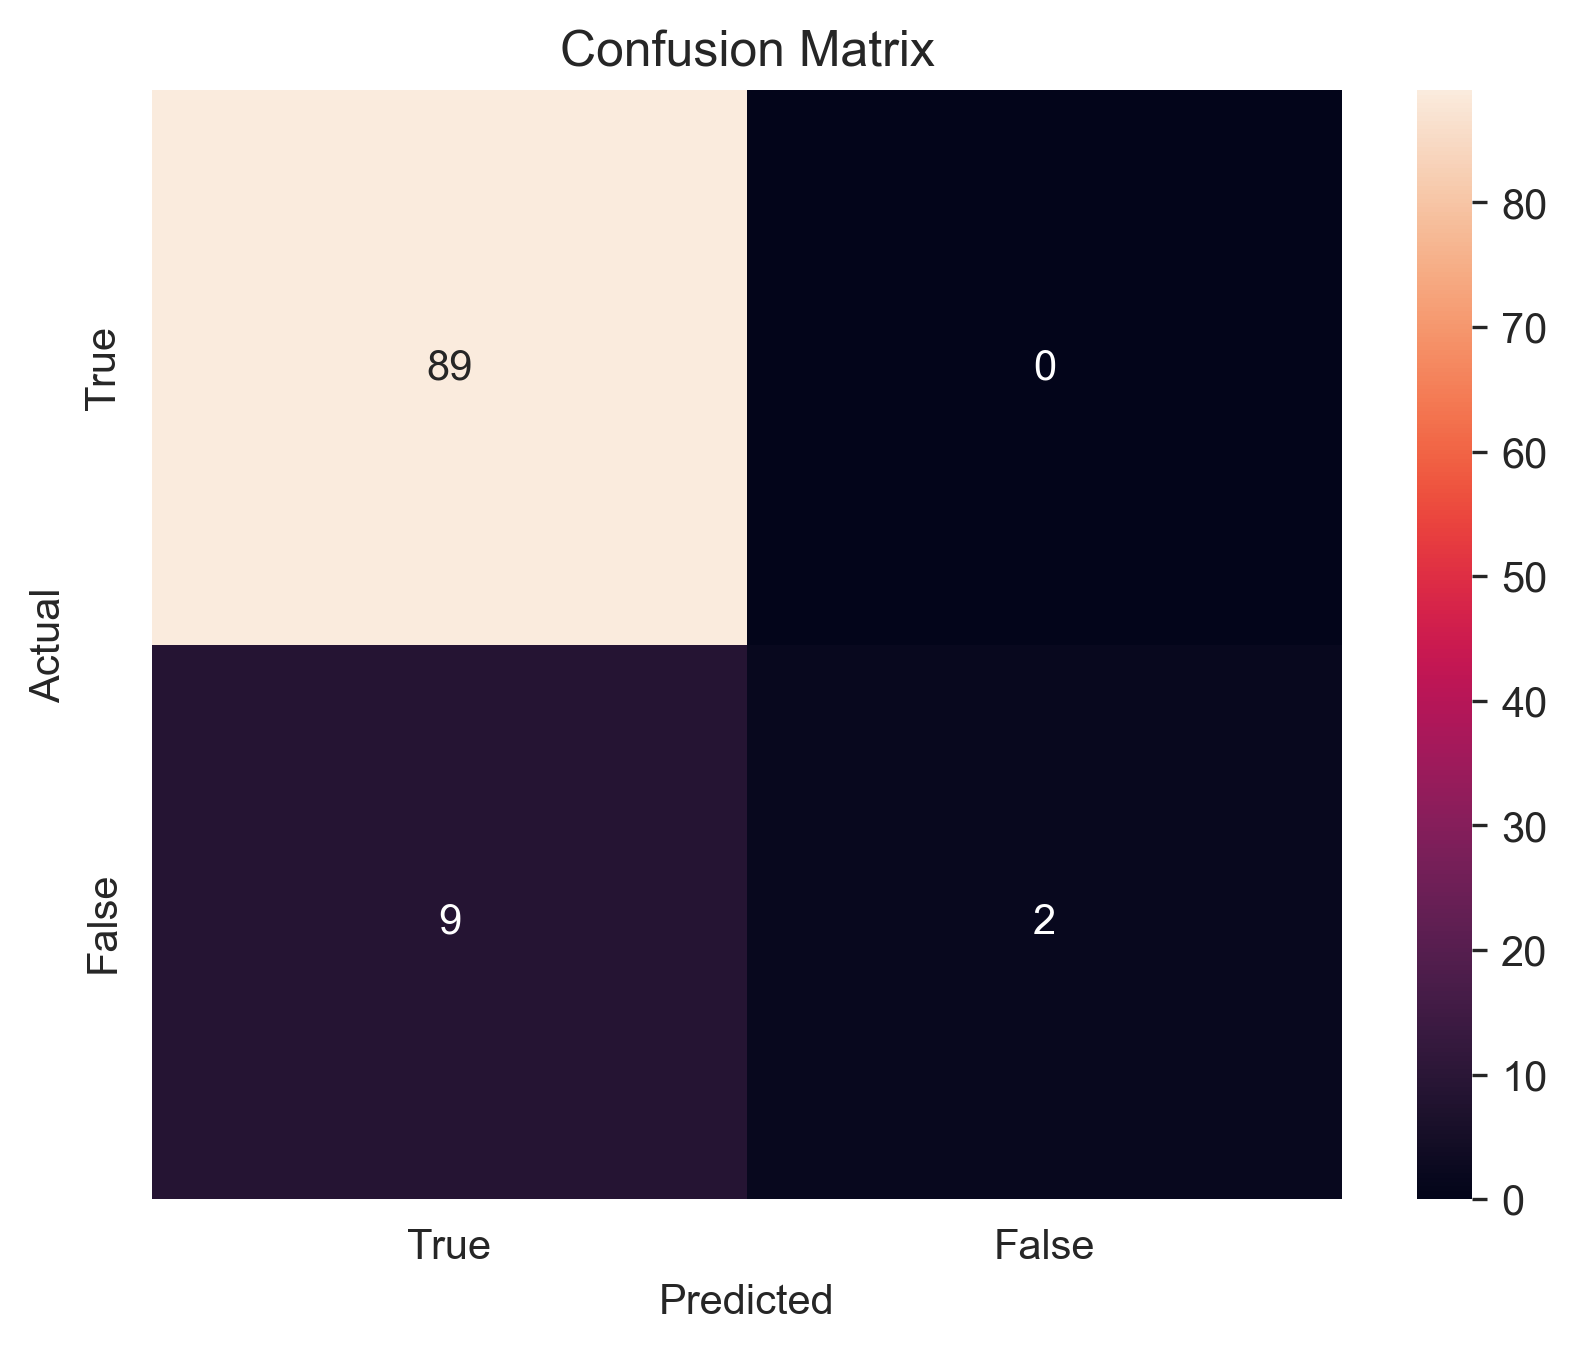

<Figure size 1920x1440 with 0 Axes>

In [23]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', 
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

plt.savefig('log_model_3.png')

In [25]:
importance = log_model_3.coef_[0]  
feature_names = X.columns  


importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df['Absolute Importance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)
print(importance_df.head(15))

                     Feature  Importance  Absolute Importance
6           Batting_df_H_avg   -1.325580             1.325580
3        Batting_df_AB_total    0.968851             0.968851
23       Batting_df_SO_total    0.892550             0.892550
27      Batting_df_HBP_total   -0.855013             0.855013
0           Batting_df_G_avg   -0.850449             0.850449
7         Batting_df_H_total   -0.827404             0.827404
13       Batting_df_HR_total    0.779090             0.779090
21       Batting_df_BB_total    0.774566             0.774566
41    BattingPost_df_H_total    0.735224             0.735224
50     BattingPost_df_SB_avg    0.706182             0.706182
51   BattingPost_df_SB_total   -0.664837             0.664837
59  BattingPost_df_IBB_total    0.663234             0.663234
31       Batting_df_SF_total    0.636577             0.636577
66   BattingPost_df_GIDP_avg   -0.595507             0.595507
2          Batting_df_AB_avg   -0.542426             0.542426
